#  Mini Project 1: Logistic Regression Classifier
## Team 2: Rubert, Mason, Yang

## 1. Import external libraries and load external file into data frame

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2')

IMPORTANT: when any change is made to external py libraries, Factory Reset of Runtime is required!

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
from logistic_regression_models import LogisticRegression_gradient_descent, LogisticRegression_maximum_likelihood
from feature_engineering import re_sample, logarithm_transformer, standard_scaler, quadratic_feature_tester
from model_evaluation import Acc_eval, cross_val, model_test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import warnings
from sklearn.utils import shuffle
from scipy import special

warnings.filterwarnings('ignore'), 
np.set_printoptions(precision=2)

force_re_run = False

In [ ]:
# paths for different files to be used in this notebook. change them if you download them in a different computer!

hepatitis_file_path =  'https://raw.githubusercontent.com/rgmartin/ECSE551/main/hepatitis.csv'
bankrupcy_file_path = 'https://raw.githubusercontent.com/rgmartin/ECSE551/main/bankrupcy.csv'

result_file_path =  '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/result.csv'
accuracies_M1H_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/accuracies_M1H.csv'
times_M1H_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/times_M1H.csv'
accuracies_M1H_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/accuracies_M1H_image.png'
times_M1H_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/times_M1H_image.png'

accuracies_M2H_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/accuracies_M2H.csv'
times_M2H_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/times_M2H.csv'
accuracies_M2H_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/accuracies_M2H_image.png'
times_M2H_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/times_M2H_image.png'

accuracies_M1B_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/accuracies_M1B.csv'
times_M1B_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/times_M1B.csv'
accuracies_M1B_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/accuracies_M1B_image.png'
times_M1B_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/times_M1B_image.png'

accuracies_M2B_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/accuracies_M2B.csv'
times_M2B_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/aux_matrix/times_M2B.csv'
accuracies_M2B_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/accuracies_M2B_image.png'
times_M2B_image_path = '/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/images_for_report/times_M2B_image.png'


## 2. Accuracy and running time 

### 2.1 Hepatitis

In [ ]:
df_data = pd.read_csv(hepatitis_file_path)

In [ ]:
rel_tol_sample = 5 # samples of rel_tol to be tested
learn_rate_sample = 30 # samples of learn_rate to be tested

min_learn_rate =  0.001
max_learn_rate = 1
exp_step = np.log10(max_learn_rate/min_learn_rate) / (learn_rate_sample-1)

rel_tol_range = (1/10**(np.arange(1,1+rel_tol_sample)))
learn_rate_range = min_learn_rate * (10 **(exp_step * np.arange(0,learn_rate_sample)))

#### 2.1.1 Gradient descent (M1-H)

In [ ]:
external_file_is_present = os.path.isfile(accuracies_M1H_path)

In [ ]:
if force_re_run or not external_file_is_present:
  best = 0

  accuracies_gd = np.zeros((rel_tol_sample, learn_rate_sample)) # accuracy matrix
  time_cost_gd = np.zeros((rel_tol_sample, 1)) #time cost per train/validate matrix

  for row in np.arange(0,rel_tol_sample):
      print('Running', end='')
      start_time = time.time()
      for col in np.arange(0, learn_rate_sample):
          X, y = re_sample(df_data, 'ClassLabel', 42)
          print('.', end='', flush=True)
          # create model
          clf  = LogisticRegression_gradient_descent(learning_rate=learn_rate_range[col], max_iter=100000, rel_tol = rel_tol_range[row],  print_time=False)
          # K-fold train and validation
          accuracies_gd[row, col] = cross_val(clf,X,y,10)
          # save best result so far
          if (best < accuracies_gd[row, col]):
              best = accuracies_gd[row, col]
              learn_rate_save = learn_rate_range[col]
              rel_tol_save = rel_tol_range[row]
      time_cost_gd[row, 0] = (time.time() - start_time)/learn_rate_sample
      print("\nTrain and test time: %.2f seconds in total, average %.2f per rate"
            % (time.time() - start_time, time_cost_gd[row, 0]))

In [ ]:
if force_re_run or not external_file_is_present:
  np.savetxt(accuracies_M1H_path, accuracies_gd,delimiter=',')
  np.savetxt(times_M1H_path, time_cost_gd,delimiter=',')
  f = open(result_file_path, "w")
  f.write('M1H, best accuracy is ' + str(best) + ', at lr = ' + str(learn_rate_save) + ', rt = ' + str(rel_tol_save) + '\n')
  f.close()
else:
  accuracies_gd = np.genfromtxt(accuracies_M1H_path,delimiter=',')
  time_cost_gd = np.genfromtxt(times_M1H_path,delimiter=',')

In [ ]:
plt.rcParams.update({'font.size': 10})

#### 2.1.2 Plot of Gradient descent

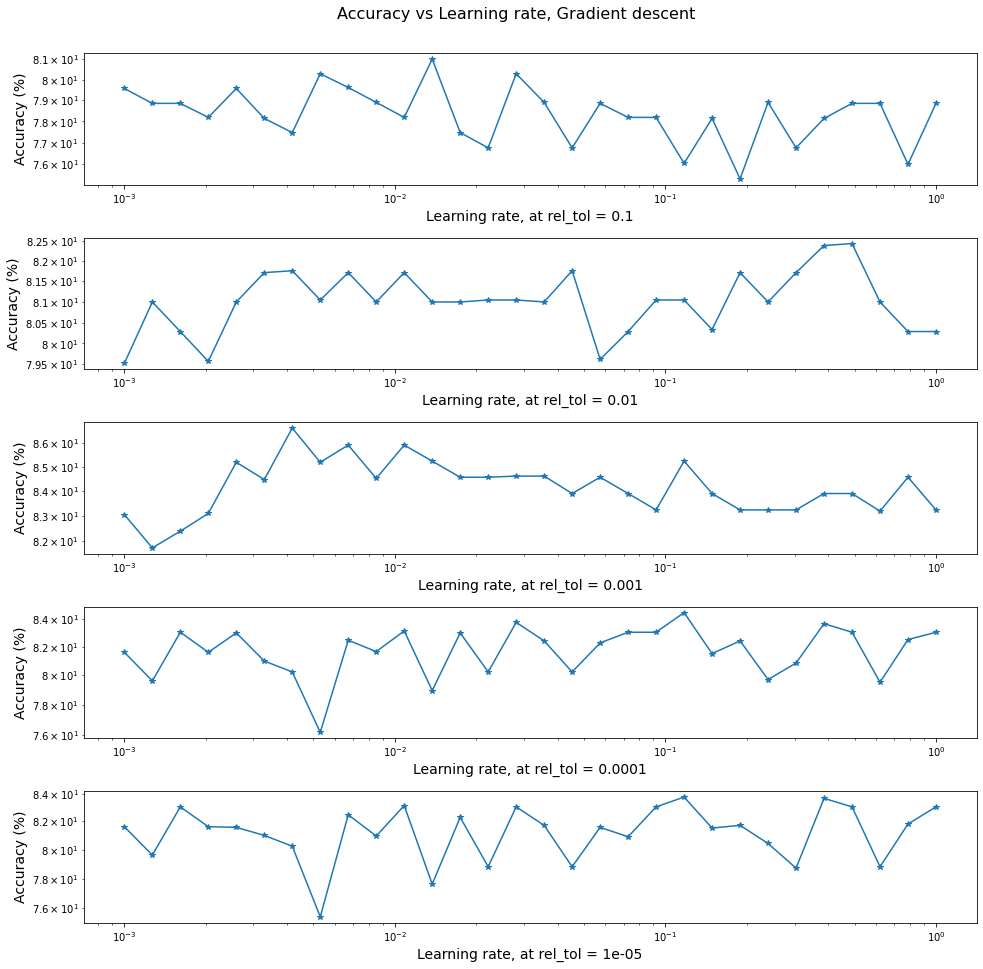

In [ ]:
plt.figure(figsize=(16, 16))
for row in np.arange(0,rel_tol_sample):
    plt.subplot(rel_tol_sample, 1, row+1)
    plt.plot(learn_rate_range, accuracies_gd[row, :],'*-')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Accuracy (%)', fontsize = 14)
    plt.xlabel('Learning rate, at rel_tol = ' + str(rel_tol_range[row]), fontsize = 14)    
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Accuracy vs Learning rate, Gradient descent', fontsize=16, y = 0.92)
plt.savefig(accuracies_M1H_image_path)

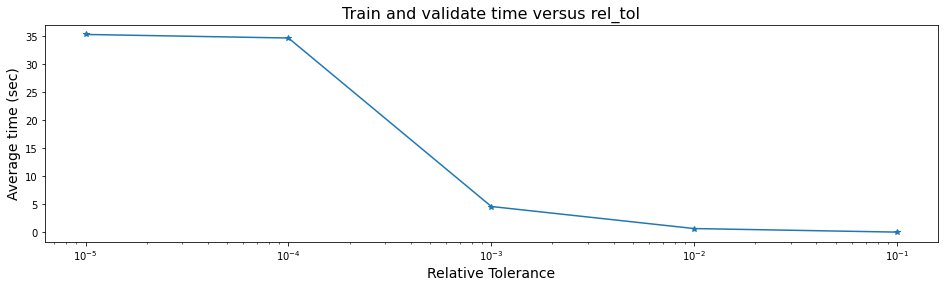

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(rel_tol_range, time_cost_gd,'*-')
plt.ylabel('Average time (sec)', fontsize = 14)
plt.xscale('log')
plt.xlabel('Relative Tolerance', fontsize = 14)
plt.title('Train and validate time versus rel_tol', fontsize=16)
plt.savefig(times_M1H_image_path)

#### 2.1.3 Maximum likelihood (M2-H)

In [ ]:
external_file_is_present = os.path.isfile(accuracies_M2H_path)

In [ ]:
if force_re_run or not external_file_is_present:
  best = 0
  
  accuracies_ml = np.zeros((rel_tol_sample, learn_rate_sample)) # accuracy matrix
  time_cost_ml = np.zeros((rel_tol_sample, 1)) #time cost per train/validate matrix

  for row in np.arange(0,rel_tol_sample):
      print('Running', end='')
      start_time = time.time()
      for col in np.arange(0, learn_rate_sample):
          X, y = re_sample(df_data, 'ClassLabel', 43)
          print('.', end='', flush=True)
          # create model
          clf  = LogisticRegression_maximum_likelihood(learning_rate=learn_rate_range[col], max_iter=100000, rel_tol = rel_tol_range[row],  print_time=False)
          # K-fold train and validation
          accuracies_ml[row, col] = cross_val(clf,X,y,10)
          # save best result so far
          if (best < accuracies_ml[row, col]):
              best = accuracies_ml[row, col]
              learn_rate_save = learn_rate_range[col]
              rel_tol_save = rel_tol_range[row]
      time_cost_ml[row, 0] = (time.time() - start_time)/learn_rate_sample
      print("\nTrain and test time: %.2f seconds in total, average %.2f per rate"
            % (time.time() - start_time, time_cost_ml[row, 0]))

In [ ]:
if force_re_run or not external_file_is_present:
  np.savetxt(accuracies_M2H_path, accuracies_ml,delimiter=',')
  np.savetxt(times_M2H_path, time_cost_ml,delimiter=',')
  f = open(result_file_path, "a")
  f.write('M1H, best accuracy is ' + str(best) + ', at lr = ' + str(learn_rate_save) + ', rt = ' + str(rel_tol_save) + '\n')
  f.close()
else:
  accuracies_ml = np.genfromtxt(accuracies_M2H_path,delimiter=',')
  time_cost_ml = np.genfromtxt(times_M2H_path,delimiter=',')

#### 2.1.4 Plot of Maximum likelihood

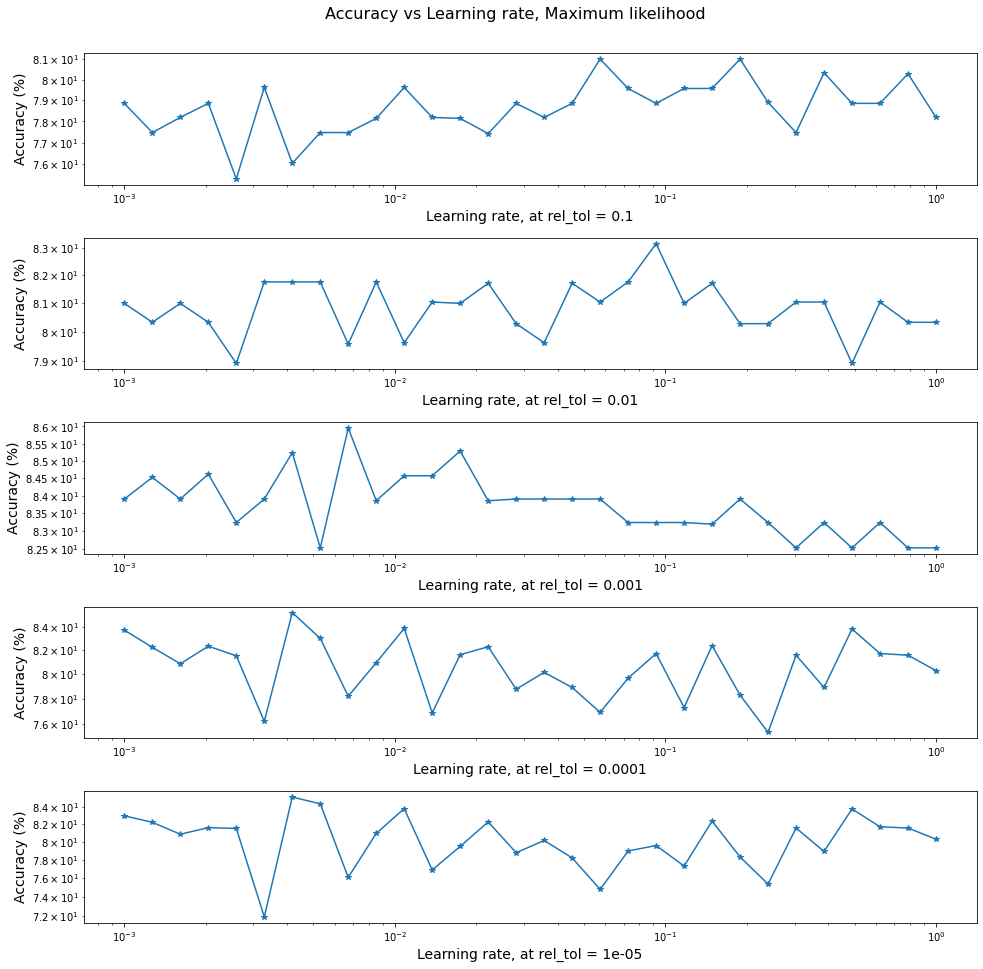

In [ ]:
plt.figure(figsize=(16, 16))
for row in np.arange(0,rel_tol_sample):
    plt.subplot(rel_tol_sample, 1, row+1)
    plt.plot(learn_rate_range, accuracies_ml[row, :],'*-')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Accuracy (%)', fontsize = 14)
    plt.xlabel('Learning rate, at rel_tol = ' + str(rel_tol_range[row]), fontsize = 14)    
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Accuracy vs Learning rate, Maximum likelihood', fontsize=16, y = 0.92)
plt.savefig(accuracies_M2H_image_path)

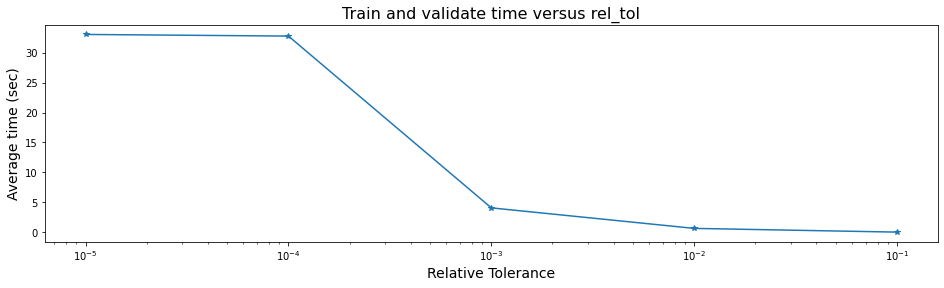

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(rel_tol_range, time_cost_ml,'*-')
plt.ylabel('Average time (sec)', fontsize = 14)
plt.xscale('log')
plt.xlabel('Relative Tolerance', fontsize = 14)
plt.title('Train and validate time versus rel_tol', fontsize=16)
plt.savefig(times_M2H_image_path)

### 2.2 Bankrupcy

In [ ]:
df_data = pd.read_csv(bankrupcy_file_path)

In [ ]:
rel_tol_sample = 5 # samples of rel_tol to be tested
learn_rate_sample = 30 # samples of learn_rate to be tested

min_learn_rate =  0.001
max_learn_rate = 1
exp_step = np.log10(max_learn_rate/min_learn_rate) / (learn_rate_sample-1)

rel_tol_range = (1/10**(np.arange(1,1+rel_tol_sample)))
learn_rate_range = min_learn_rate * (10 **(exp_step * np.arange(0,learn_rate_sample)))

#### 2.2.1 Gradient descent M1-B

In [ ]:
external_file_is_present = os.path.isfile(accuracies_M1B_path)

In [ ]:
if force_re_run or not external_file_is_present:
  best = 0
  accuracies_gd = np.zeros((rel_tol_sample, learn_rate_sample)) # accuracy matrix
  time_cost_gd = np.zeros((rel_tol_sample, 1)) #time cost per train/validate matrix

  for row in np.arange(0,rel_tol_sample):
      print('Running', end='')
      start_time = time.time()
      for col in np.arange(0, learn_rate_sample):
          X, y = re_sample(df_data, 'ClassLabel', 44)
          print('.', end='', flush=True)
          # create model
          clf  = LogisticRegression_gradient_descent(learning_rate=learn_rate_range[col], max_iter=100000, rel_tol = rel_tol_range[row],  print_time=False)
          # K-fold train and validation
          accuracies_gd[row, col] = cross_val(clf,X,y,10)
          # save best result so far
          if (best < accuracies_gd[row, col]):
              best = accuracies_gd[row, col]
              learn_rate_save = learn_rate_range[col]
              rel_tol_save = rel_tol_range[row]
      time_cost_gd[row, 0] = (time.time() - start_time)/learn_rate_sample
      print("\nTrain and test time: %.2f seconds in total, average %.2f per rate"
            % (time.time() - start_time, time_cost_gd[row, 0]))

In [ ]:
if force_re_run or not external_file_is_present:
  np.savetxt(accuracies_M1B_path, accuracies_gd,delimiter=',')
  np.savetxt(times_M1B_path, time_cost_gd,delimiter=',')
  f = open(result_file_path, "a")
  f.write('M1H, best accuracy is ' + str(best) + ', at lr = ' + str(learn_rate_save) + ', rt = ' + str(rel_tol_save) + '\n')
  f.close()
else:
  accuracies_gd = np.genfromtxt(accuracies_M1B_path,delimiter=',')
  time_cost_gd = np.genfromtxt(times_M1B_path,delimiter=',')

#### 2.2.2 Plot of Gradient descent

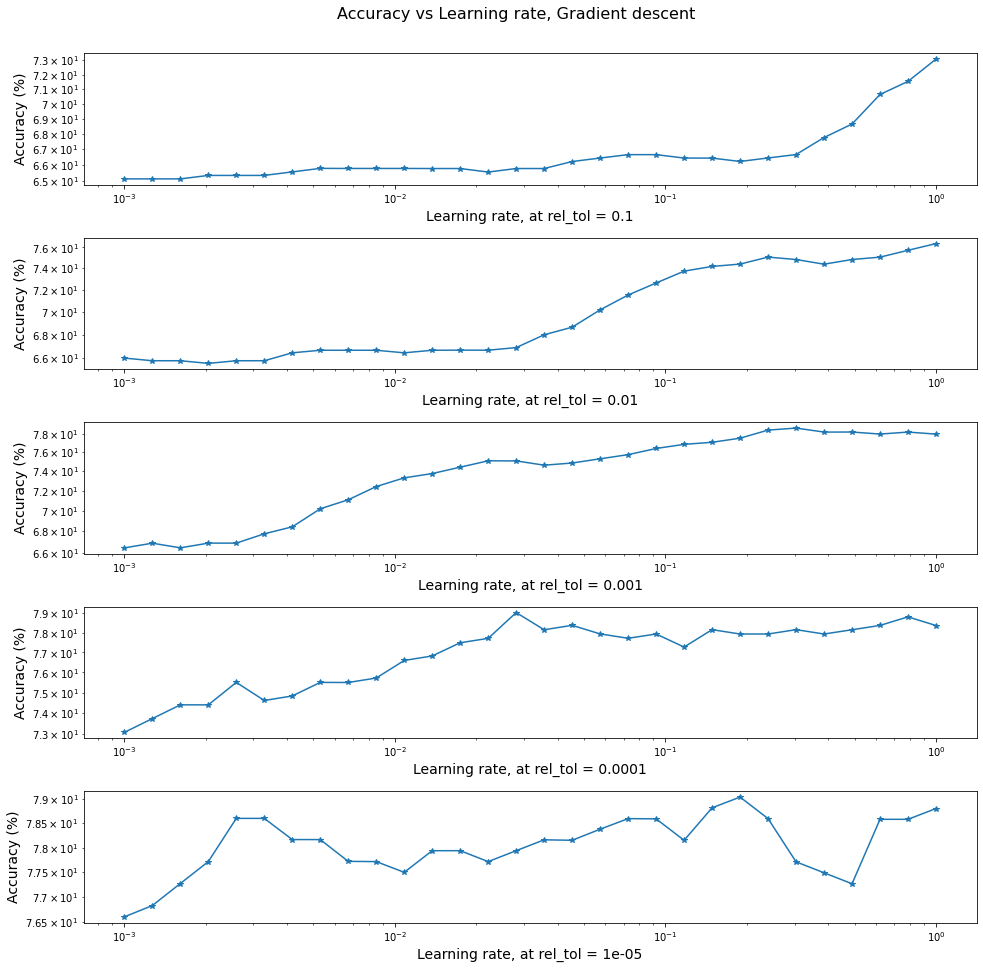

In [ ]:
plt.figure(figsize=(16, 16))
for row in np.arange(0,rel_tol_sample):
    plt.subplot(rel_tol_sample, 1, row+1)
    plt.plot(learn_rate_range, accuracies_gd[row, :],'*-')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Accuracy (%)', fontsize = 14)
    plt.xlabel('Learning rate, at rel_tol = ' + str(rel_tol_range[row]), fontsize = 14)    
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Accuracy vs Learning rate, Gradient descent', fontsize=16, y = 0.92)
plt.savefig(accuracies_M1B_image_path)

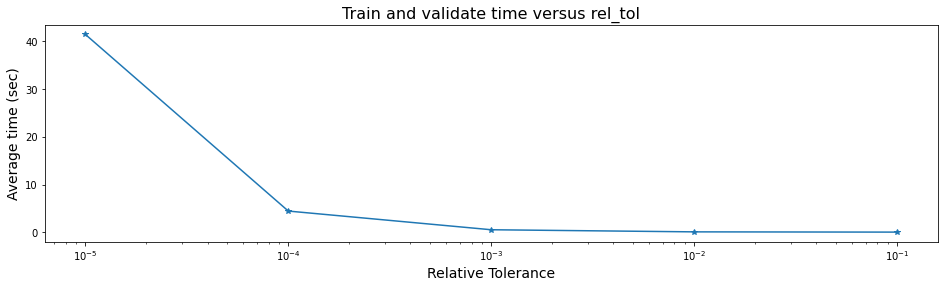

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(rel_tol_range, time_cost_gd,'*-')
plt.ylabel('Average time (sec)', fontsize = 14)
plt.xscale('log')
plt.xlabel('Relative Tolerance', fontsize = 14)
plt.title('Train and validate time versus rel_tol', fontsize=16)
plt.savefig(times_M1B_image_path)

#### 2.2.3. Maximum likelihood M2-B

In [ ]:
external_file_is_present = os.path.isfile(accuracies_M2B_path)

In [ ]:
if force_re_run or not external_file_is_present:
  best = 0
  rel_tol_range = (1/10**(np.arange(1,1+rel_tol_sample)))
  learn_rate_range = np.linspace(0.01, 0.51, learn_rate_sample)
  accuracies_ml = np.zeros((rel_tol_sample, learn_rate_sample)) # accuracy matrix
  time_cost_ml = np.zeros((rel_tol_sample, 1)) #time cost per train/validate matrix

  for row in np.arange(0,rel_tol_sample):
      print('Running', end='')
      start_time = time.time()
      for col in np.arange(0, learn_rate_sample):
          X, y = re_sample(df_data, 'ClassLabel', 45)
          print('.', end='', flush=True)
          # create model
          clf  = LogisticRegression_maximum_likelihood(learning_rate=learn_rate_range[col], max_iter=100000, rel_tol = rel_tol_range[row],  print_time=False)
          # K-fold train and validation
          accuracies_ml[row, col] = cross_val(clf,X,y,10)
          # save best result so far
          if (best < accuracies_ml[row, col]):
              best = accuracies_ml[row, col]
              learn_rate_save = learn_rate_range[col]
              rel_tol_save = rel_tol_range[row]
      time_cost_ml[row, 0] = (time.time() - start_time)/learn_rate_sample
      print("\nTrain and test time: %.2f seconds in total, average %.2f per rate"
            % (time.time() - start_time, time_cost_ml[row, 0]))

In [ ]:
if force_re_run or not external_file_is_present:
  np.savetxt(accuracies_M2B_path, accuracies_ml,delimiter=',')
  np.savetxt(times_M2B_path, time_cost_ml,delimiter=',')
  f = open(result_file_path, "a")
  f.write('M2B, best accuracy is ' + str(best) + ', at lr = ' + str(learn_rate_save) + ', rt = ' + str(rel_tol_save) + '\n')
  f.close()
else:
  accuracies_ml = np.genfromtxt(accuracies_M2B_path,delimiter=',')
  time_cost_ml = np.genfromtxt(times_M2B_path,delimiter=',')

#### 2.2.4 Plot of Maximum likelihood

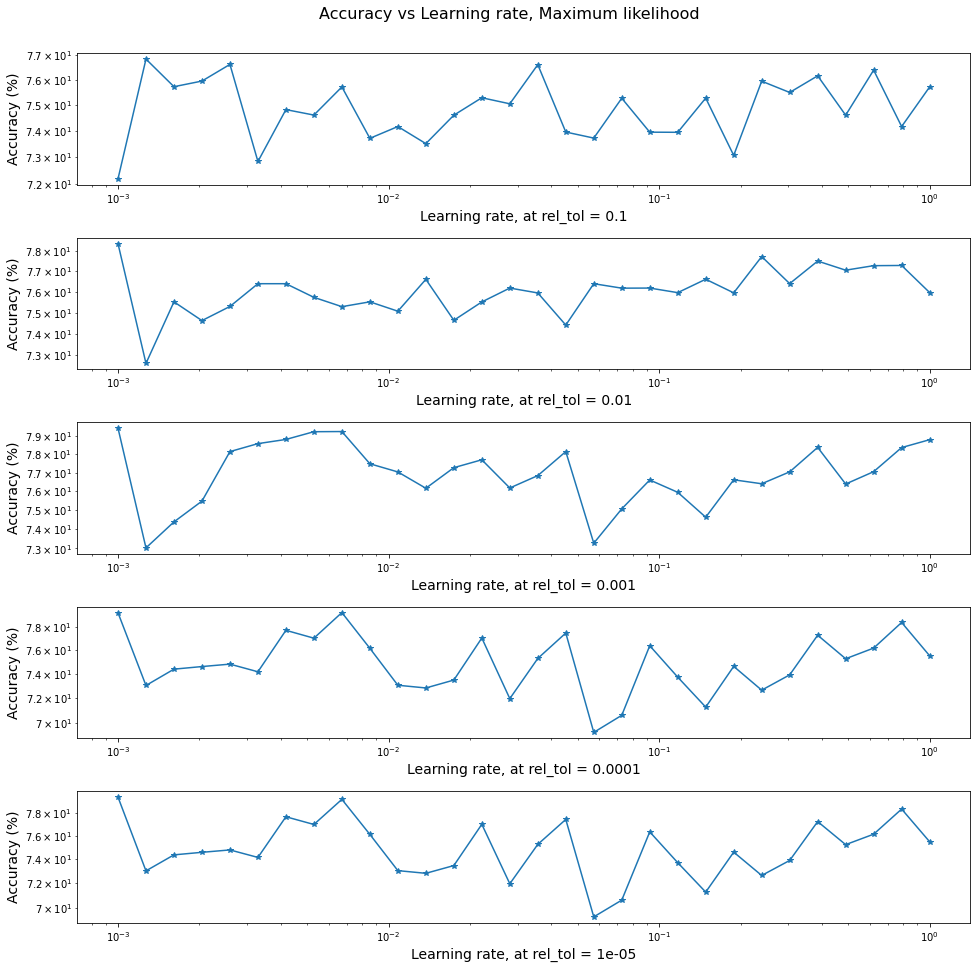

In [ ]:
plt.figure(figsize=(16, 16))
for row in np.arange(0,rel_tol_sample):
    plt.subplot(rel_tol_sample, 1, row+1)
    plt.plot(learn_rate_range, accuracies_ml[row, :],'*-')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Accuracy (%)', fontsize = 14)
    plt.xlabel('Learning rate, at rel_tol = ' + str(rel_tol_range[row]), fontsize = 14)    
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Accuracy vs Learning rate, Maximum likelihood', fontsize=16, y = 0.92)
plt.savefig(accuracies_M2B_image_path)

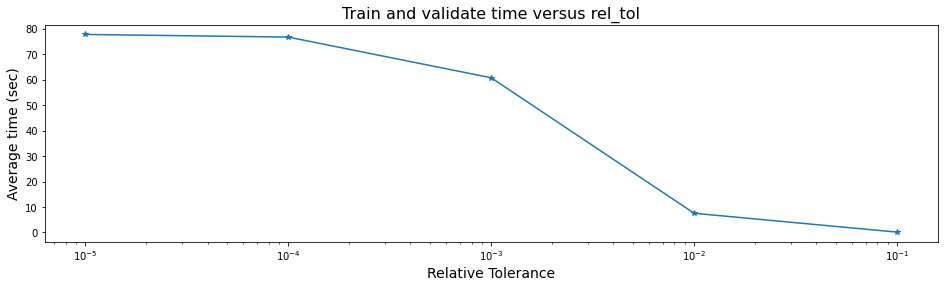

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(rel_tol_range, time_cost_ml,'*-')
plt.ylabel('Average time (sec)', fontsize = 14)
plt.xscale('log')
plt.xlabel('Relative Tolerance', fontsize = 14)
plt.title('Train and validate time versus rel_tol', fontsize=16)
plt.savefig(times_M2B_image_path)

## 3. Model optimization

In [ ]:
no_of_models = 4
acc_original = np.zeros((no_of_models,))
acc_normalized = np.zeros((no_of_models,))
acc_standardized =  np.zeros((no_of_models,))
acc_norm_std =  np.zeros((no_of_models,))
acc_squared =  np.zeros((no_of_models,))

####  Hepatitis modelling - gradient descent

1. Data adquisition

In [ ]:
df_data = pd.read_csv(hepatitis_file_path)

features = [feature for feature in df_data if feature not in ['ClassLabel']]
continuous_features = [ feature for feature in df_data if len(df_data[feature].unique()) > 25]  
discrete_features = [ feature for feature in df_data if len(df_data[feature].unique()) < 25]
discrete_features = discrete_features[:-1]
model_index = 0

2. Feature engineering

In [ ]:
clf  = LogisticRegression_gradient_descent(learning_rate=0.1, max_iter=100000, rel_tol=0.01,  print_time=False)

Let's first try with the original data

In [ ]:
X,y =re_sample(df_data)

In [ ]:
acc_original[model_index] = cross_val(clf,X,y,10)
print('Accuracy with original data = ', acc_original[model_index])

Accuracy with original data =  81.0


Now let's try normalize the data

In [ ]:
log_transformed_df = logarithm_transformer(df_data)

In [ ]:
X2, y2 = re_sample(log_transformed_df)

In [ ]:
acc_normalized[model_index] = cross_val(clf,X2,y2,10)
print('Accuracy with normalized data = ', acc_normalized[model_index])

Accuracy with normalized data =  80.28571428571429


Let's instead standarize the data

In [ ]:
standard_df = standard_scaler(df_data)

In [ ]:
X3,y3 =re_sample(standard_df)

In [ ]:
acc_standardized[model_index] = cross_val(clf,X3,y3,10)
print('Accuracy with standarized data = ', acc_standardized[model_index])

Accuracy with standarized data =  86.57142857142858


Finally, let's try the combination of logarithmization and standarization

In [ ]:
standard_log_df = standard_scaler(logarithm_transformer(df_data))

In [ ]:
X4,y4 = re_sample(standard_log_df)

In [ ]:
acc_norm_std[model_index] = cross_val(clf,X4,y4,10)
print('Accuracy with standarized and log data = ', acc_norm_std[model_index])

Accuracy with standarized and log data =  86.61904761904762


Just another test, let's try incorporating squared features by turn and train the model with the resulting data

In [ ]:
feature_to_square = ''
for feature in features:
  quadtratic_feature_df =  quadratic_feature_tester(standard_log_df,[feature])
  X5,y5 = re_sample(quadtratic_feature_df)
  acc5 = cross_val(clf, X5, y5, 10)
  if acc5>acc_squared[model_index]:
    acc_squared[model_index] = acc5
    feature_to_square = feature
  print('Accuracy with feature {} square  = {}'.format(feature, acc5))
print('Maximum accuracy: {:f}, which corresponds to squaring \'{}\' '.format(acc_squared[model_index],feature_to_square))

Accuracy with feature age square  = 87.28571428571429
Accuracy with feature sex square  = 87.28571428571429
Accuracy with feature steroid square  = 86.57142857142858
Accuracy with feature antivirals square  = 86.61904761904762
Accuracy with feature fatigue square  = 86.61904761904762
Accuracy with feature malaise square  = 86.61904761904762
Accuracy with feature anorexia square  = 86.61904761904762
Accuracy with feature liver_big square  = 87.28571428571429
Accuracy with feature liver_firm square  = 86.57142857142858
Accuracy with feature spleen_palable square  = 86.57142857142858
Accuracy with feature spiders square  = 84.52380952380952
Accuracy with feature ascites square  = 87.23809523809523
Accuracy with feature varices square  = 85.85714285714286
Accuracy with feature bilirubin square  = 85.0952380952381
Accuracy with feature alk_phosphate square  = 87.28571428571429
Accuracy with feature sgot square  = 86.61904761904762
Accuracy with feature albumin square  = 86.61904761904762
Ac

####  Hepatitis modelling - maximum likelihood

1. Data adquisition

In [ ]:
hepatitis_file_path = "/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/hepatitis.csv"
df_data = pd.read_csv(hepatitis_file_path)

features = [feature for feature in df_data if feature not in ['ClassLabel']]
continuous_features = [ feature for feature in df_data if len(df_data[feature].unique()) > 25]  
discrete_features = [ feature for feature in df_data if len(df_data[feature].unique()) < 25]
discrete_features = discrete_features[:-1]
model_index = 1

2. Feature engineering

In [ ]:
clf  = LogisticRegression_maximum_likelihood(learning_rate=0.1, max_iter=100000, rel_tol=0.01,  print_time=False)

Let's first try with the original data

In [ ]:
X,y =re_sample(df_data)

In [ ]:
acc_original[model_index] = cross_val(clf,X,y,10)
print('Accuracy with original data = ', acc_original[model_index])

Accuracy with original data =  80.33333333333334


Now let's try normalize the data

In [ ]:
log_transformed_df = logarithm_transformer(df_data)

In [ ]:
X2, y2 = re_sample(log_transformed_df)

In [ ]:
acc_normalized[model_index] = cross_val(clf,X2,y2,10)
print('Accuracy with normalized data = ', acc_normalized[model_index])

Accuracy with normalized data =  83.0952380952381


Let's instead standarize the data

In [ ]:
standard_df = standard_scaler(df_data)

In [ ]:
X3,y3 =re_sample(standard_df)

In [ ]:
acc_standardized[model_index] = cross_val(clf,X3,y3,10)
print('Accuracy with standarized data = ', acc_standardized[model_index])

Accuracy with standarized data =  82.38095238095238


Finally, let's try the combination of logarithmization and standarization

In [ ]:
standard_log_df = standard_scaler(logarithm_transformer(df_data))

In [ ]:
X4,y4 = re_sample(standard_log_df)

In [ ]:
acc_norm_std[model_index] = cross_val(clf,X4,y4,10)
print('Accuracy with standarized and log data = ', acc_norm_std[model_index])

Accuracy with standarized and log data =  83.0952380952381


We conclude that taking logs and then applying standarization is the best feature engineering to apply!!!

Just another test, let's try incorporating squared features by turn and train the model with the resulting data

In [ ]:
feature_to_square = ''
for feature in features:
  quadtratic_feature_df =  quadratic_feature_tester(standard_log_df,[feature])
  X5,y5 = re_sample(quadtratic_feature_df)
  acc5 = cross_val(clf, X5, y5, 10)
  if acc5>acc_squared[model_index]:
    acc_squared[model_index] = acc5
    feature_to_square = feature
  print('Accuracy with feature {} squared  = {}'.format(feature, acc5))
print('Maximum accuracy: {:f}, which corresponds to squaring \'{}\' '.format(acc_squared[model_index],feature_to_square))

Accuracy with feature age squared  = 83.0952380952381
Accuracy with feature sex squared  = 81.66666666666667
Accuracy with feature steroid squared  = 83.14285714285715
Accuracy with feature antivirals squared  = 83.19047619047619
Accuracy with feature fatigue squared  = 83.80952380952381
Accuracy with feature malaise squared  = 83.0952380952381
Accuracy with feature anorexia squared  = 82.47619047619048
Accuracy with feature liver_big squared  = 82.42857142857144
Accuracy with feature liver_firm squared  = 82.42857142857144
Accuracy with feature spleen_palable squared  = 83.80952380952381
Accuracy with feature spiders squared  = 81.66666666666667
Accuracy with feature ascites squared  = 83.0952380952381
Accuracy with feature varices squared  = 83.14285714285715
Accuracy with feature bilirubin squared  = 82.38095238095238
Accuracy with feature alk_phosphate squared  = 81.0952380952381
Accuracy with feature sgot squared  = 83.0952380952381
Accuracy with feature albumin squared  = 80.3809

####  Bankruptcy modelling - gradient descent

1. Data adquisition

In [ ]:
df_data = pd.read_csv(bankrupcy_file_path)

features = [feature for feature in df_data if feature not in ['ClassLabel']]
continuous_features = [ feature for feature in df_data if len(df_data[feature].unique()) > 25]  
discrete_features = [ feature for feature in df_data if len(df_data[feature].unique()) < 25]
discrete_features = discrete_features[:-1]
model_index = 2

2. Feature engineering

In [ ]:
clf  = LogisticRegression_gradient_descent(learning_rate=0.1, max_iter=100000, rel_tol=0.01,  print_time=False)

Let's first try with the original data

In [ ]:
X,y =re_sample(df_data)

In [ ]:
acc_original[model_index] = cross_val(clf,X,y,10)
print('Accuracy with original data = ', acc_original[model_index])

Accuracy with original data =  72.85507246376811


Now let's try normalize the data

In [ ]:
log_transformed_df = logarithm_transformer(df_data)

In [ ]:
X2, y2 = re_sample(log_transformed_df)

In [ ]:
acc_normalized[model_index] = cross_val(clf,X2,y2,10)
print('Accuracy with normalized data = ', acc_normalized[model_index])

Accuracy with normalized data =  44.811594202898554


Let's instead standarize the data

In [ ]:
standard_df = standard_scaler(df_data)

In [ ]:
X3,y3 =re_sample(standard_df)

In [ ]:
acc_standardized[model_index] = cross_val(clf,X3,y3,10)
print('Accuracy with standarized data = ', acc_standardized[model_index])

Accuracy with standarized data =  73.97584541062801


Finally, let's try the combination of logarithmization and standarization

In [ ]:
standard_log_df = standard_scaler(logarithm_transformer(df_data))

In [ ]:
X4,y4 = re_sample(standard_df)

In [ ]:
acc_norm_std[model_index] = cross_val(clf,X4,y4,10)
print('Accuracy with standarized and log data = ', acc_norm_std[model_index])

Accuracy with standarized and log data =  73.97584541062801


Just another test, let's try incorporating squared features by turn and train the model with the resulting data

In [ ]:
feature_to_square = ''
for feature in features:
  quadtratic_feature_df =  quadratic_feature_tester(standard_df,[feature])
  X5,y5 = re_sample(quadtratic_feature_df)
  acc5 = cross_val(clf, X5, y5, 10)
  if acc5>acc_squared[model_index]:
    acc_squared[model_index] = acc5
    feature_to_square = feature
  print('Accuracy with feature {} square  = {}'.format(feature, acc5))
print('Maximum accuracy: {:f}, which corresponds to squaring \'{}\' '.format(acc_squared[model_index],feature_to_square))

Accuracy with feature attribute1 square  = 73.7536231884058
Accuracy with feature attribute2 square  = 73.97584541062801
Accuracy with feature attribute3 square  = 73.54106280193237
Accuracy with feature attribute4 square  = 73.09178743961353
Accuracy with feature attribute5 square  = 75.29951690821255
Accuracy with feature attribute6 square  = 74.19806763285024
Accuracy with feature attribute7 square  = 73.7536231884058
Accuracy with feature attribute8 square  = 74.63768115942028
Accuracy with feature attribute9 square  = 73.97101449275362
Accuracy with feature attribute10 square  = 73.97584541062801
Accuracy with feature attribute11 square  = 74.19323671497584
Accuracy with feature attribute12 square  = 73.97584541062801
Accuracy with feature attribute13 square  = 73.74879227053141
Accuracy with feature attribute14 square  = 73.7536231884058
Accuracy with feature attribute15 square  = 74.19323671497582
Accuracy with feature attribute16 square  = 74.85507246376814
Accuracy with featur

####  Bankruptcy modelling - maximum likelihood

1. Data adquisition

In [ ]:
bankrupcy_file_path = "/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/bankrupcy.csv"
df_data = pd.read_csv(bankrupcy_file_path)

features = [feature for feature in df_data if feature not in ['ClassLabel']]
continuous_features = [ feature for feature in df_data if len(df_data[feature].unique()) > 25]  
discrete_features = [ feature for feature in df_data if len(df_data[feature].unique()) < 25]
discrete_features = discrete_features[:-1]
model_index = 3

2. Feature engineering

In [ ]:
clf  = LogisticRegression_maximum_likelihood(learning_rate=0.1, max_iter=100000, rel_tol=0.01,  print_time=False)

Let's first try with the original data

In [ ]:
X,y =re_sample(df_data)

In [ ]:
acc_original[model_index] = cross_val(clf,X,y,10)
print('Accuracy with original data = ', acc_original[model_index])

Accuracy with original data =  75.5024154589372


Now let's try normalize the data

In [ ]:
log_transformed_df = logarithm_transformer(df_data)

In [ ]:
X2, y2 = re_sample(log_transformed_df)

In [ ]:
acc_normalized[model_index] = cross_val(clf,X2,y2,10)
print('Accuracy with normalized data = ', acc_normalized[model_index])

Accuracy with normalized data =  44.811594202898554


Let's instead standarize the data

In [ ]:
standard_df = standard_scaler(df_data)

In [ ]:
X3,y3 =re_sample(standard_df)

In [ ]:
acc_standardized[model_index] = cross_val(clf,X3,y3,10)
print('Accuracy with standarized data = ', acc_standardized[model_index])

Accuracy with standarized data =  78.34782608695652


Finally, let's try the combination of logarithmization and standarization

In [ ]:
standard_log_df = standard_scaler(logarithm_transformer(df_data))

In [ ]:
X4,y4 = re_sample(standard_df)

In [ ]:
acc_norm_std[model_index] = cross_val(clf,X4,y4,10)
print('Accuracy with standarized and log data = ', acc_norm_std[model_index])

Accuracy with standarized and log data =  78.34782608695652


We conclude that taking logs and then applying standarization is the best feature engineering to apply!!!

Squaring features

In [ ]:
feature_to_square = ''
for feature in features:
  quadtratic_feature_df =  quadratic_feature_tester(standard_df,[feature])
  X5,y5 = re_sample(quadtratic_feature_df)
  acc5 = cross_val(clf, X5, y5, 10)
  if acc5>acc_squared[model_index]:
    acc_squared[model_index] = acc5
    feature_to_square = feature
  print('Accuracy with feature {} square  = {}'.format(feature, acc5))
print('Maximum accuracy: {:f}, which corresponds to squaring \'{}\' '.format(acc_squared[model_index],feature_to_square))

Accuracy with feature attribute1 square  = 78.34782608695653
Accuracy with feature attribute2 square  = 76.80193236714976
Accuracy with feature attribute3 square  = 74.3671497584541
Accuracy with feature attribute4 square  = 78.1159420289855
Accuracy with feature attribute5 square  = 78.3671497584541
Accuracy with feature attribute6 square  = 77.47826086956522
Accuracy with feature attribute7 square  = 77.90338164251207
Accuracy with feature attribute8 square  = 77.48309178743962
Accuracy with feature attribute9 square  = 78.36231884057972
Accuracy with feature attribute10 square  = 77.25603864734299
Accuracy with feature attribute11 square  = 77.02898550724638
Accuracy with feature attribute12 square  = 75.27536231884059
Accuracy with feature attribute13 square  = 77.03864734299518
Accuracy with feature attribute14 square  = 77.90821256038647
Accuracy with feature attribute15 square  = 76.82608695652172
Accuracy with feature attribute16 square  = 78.3719806763285
Accuracy with feature

### 4. Accuracy visualization

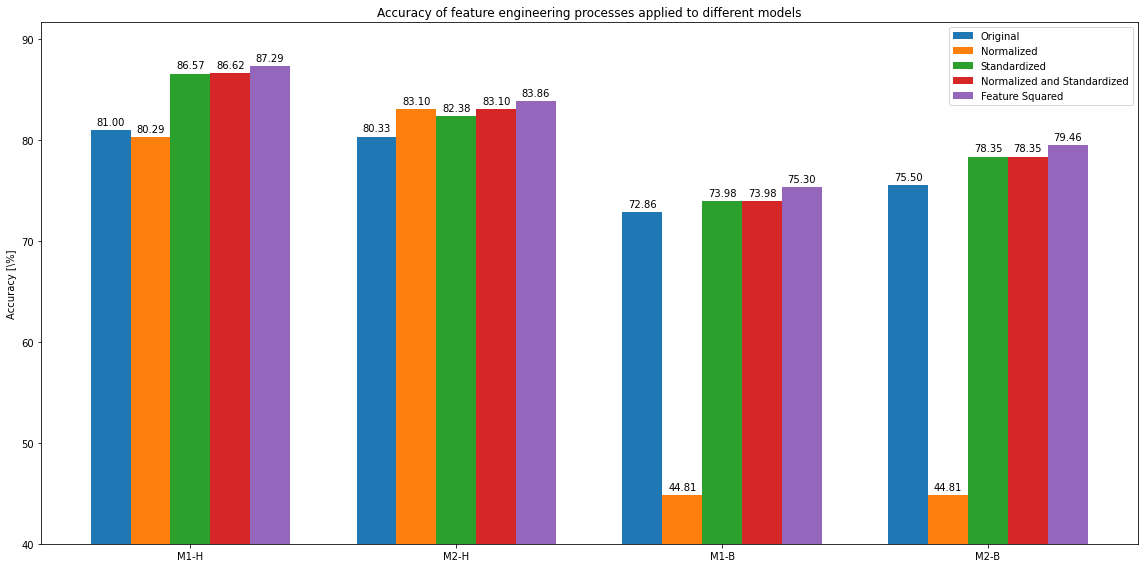

In [ ]:
labels = ['M1-H','M2-H','M1-B','M2-B']

x = np.arange(len(labels))
width = 0.15

f,a = plt.subplots(figsize = (16,8))

rects1 = a.bar(x-4*  width/2, acc_original,    width,label='Original')
rects2 = a.bar(x -2*width/2, acc_normalized,  width,label='Normalized')
rects3 = a.bar(x, acc_standardized,width,label='Standardized')
rects4 = a.bar(x+2*width/2, acc_norm_std,    width,label='Normalized and Standardized')
rects5 = a.bar(x+4*width/2, acc_squared,     width,label='Feature Squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
a.set_ylabel('Accuracy [\%]')
a.set_title('Accuracy of feature engineering processes applied to different models')
a.set_xticks(x)
a.set_ylim(bottom=40)
a.set_xticklabels(labels)
a.legend( loc='best')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        a.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

f.tight_layout()

plt.show()

## 4. Proposed Model

### Hepatitis Dataset

In [ ]:
# training data
df_data = pd.read_csv(hepatitis_file_path)
standard_log_df = standard_scaler(logarithm_transformer(df_data))

In [ ]:
# testing data (TBD)
df_data_test = pd.read_csv(hepatitis_file_path)
standard_log_df_test = standard_scaler(logarithm_transformer(df_data_test))

In [ ]:
X_val, y_val = re_sample(standard_log_df, 'ClassLabel', 42)
X, y = re_sample(standard_log_df_test, 'ClassLabel', 42)

In [ ]:
accuracies_gd = np.genfromtxt(accuracies_M1H_path,delimiter=',')
time_cost_gd = np.genfromtxt(times_M1H_path,delimiter=',')

In [ ]:
m1h_max = np.unravel_index(np.argmax(accuracies_gd), accuracies_gd.shape)
learning_rate_m1h = m1h_max[1]
rel_tol_m1h = m1h_max[0]

# create model
clf  = LogisticRegression_gradient_descent(learning_rate=learn_rate_range[learning_rate_m1h], max_iter=100000, rel_tol = rel_tol_range[rel_tol_m1h],  print_time=False)

# final result
print(model_test(clf, X_val, y_val, X, y))

# accuracies = cross_val(clf,X,y,10)
# print(accuracies)


85.2112676056338


### Bankruptcy Dataset

In [ ]:
# training data
df_data = pd.read_csv(bankrupcy_file_path)
standard_log_df = standard_scaler(logarithm_transformer(df_data))

In [ ]:
# testing data (TBD)
df_data_test = pd.read_csv(bankrupcy_file_path)
standard_log_df_test = standard_scaler(logarithm_transformer(df_data_test))

In [ ]:
X_val, y_val = re_sample(df_data, 'ClassLabel', 45)
X, y = re_sample(df_data_test, 'ClassLabel', 45)

In [ ]:
accuracies_ml = np.genfromtxt(accuracies_M2B_path,delimiter=',')
time_cost_ml = np.genfromtxt(times_M2B_path,delimiter=',')

In [ ]:
m2b_max = np.unravel_index(np.argmax(accuracies_ml), accuracies_ml.shape)
learning_rate_m2b = m2b_max[1]
rel_tol_m2b = m2b_max[0]

# create model
clf  = LogisticRegression_maximum_likelihood(learning_rate=learn_rate_range[learning_rate_m2b], max_iter=100000, rel_tol = rel_tol_range[rel_tol_m2b],  print_time=False)

# final result
print(model_test(clf, X_val, y_val, X, y))

# accuracies = cross_val(clf,X,y,10)
# print(accuracies)

81.23620309050773
